In [326]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [327]:
df = pd.read_csv("./water_potability.csv")

In [328]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [329]:
np.shape(df)

(104832, 10)

In [330]:
print("Number of null values in different columns")
print(df.isna().sum())

Number of null values in different columns
ph                 15712
Hardness               0
Solids                 0
Chloramines            0
Sulfate            24992
Conductivity           0
Organic_carbon         0
Trihalomethanes     5184
Turbidity              0
Potability             0
dtype: int64


In [331]:
df=df.dropna()

In [332]:
# df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
# df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
# df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [333]:
np.shape(df)

(64352, 10)

In [334]:
print("Number of null values after dropping null values")
print(df.isna().sum())

Number of null values after dropping null values
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [335]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.572958,32.627223,8640.157938,1.584438,41.195246,80.693129,3.324158,16.073237,0.780158,0.490560
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089431,176.736376,15613.160530,6.137757,307.621462,366.558131,12.120956,55.947322,3.442848,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.053044,216.454108,27192.280560,8.110140,359.392567,482.451933,16.684074,77.297300,4.515150,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [336]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

In [337]:
df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,38400,38400,38400,38400,38400,38400,38400,38400,38400
1,25952,25952,25952,25952,25952,25952,25952,25952,25952


In [338]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [339]:
from sklearn.preprocessing import MinMaxScaler


In [340]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [341]:
from sklearn.model_selection import train_test_split


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [343]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 57916
Size Testing Set: 6436


In [344]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [345]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",mode = 'auto',patience=15)

In [346]:
model = keras.Sequential()
# model.add(layers.Dense(20,input_dim=9, activation='relu'))
model.add(layers.Dense(20,input_dim=9, activation='elu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

In [347]:
opt = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

In [348]:
history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
# history = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test))

Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 37us/sample - loss: 0.2464 - acc: 0.5932 - val_loss: 0.2386 - val_acc: 0.6019
Epoch 2/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2406 - acc: 0.5967 - val_loss: 0.2396 - val_acc: 0.6019
Epoch 3/400
57916/57916 [==============================] - 1s 21us/sample - loss: 0.2403 - acc: 0.5994 - val_loss: 0.2393 - val_acc: 0.6019
Epoch 4/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2404 - acc: 0.6000 - val_loss: 0.2387 - val_acc: 0.6074
Epoch 5/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2396 - acc: 0.6016 - val_loss: 0.2380 - val_acc: 0.6044
Epoch 6/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2394 - acc: 0.6031 - val_loss: 0.2364 - val_acc: 0.6094
Epoch 7/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2387 - acc: 0.6036 - val_lo

In [349]:
#test 1

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='relu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 40us/sample - loss: 0.2389 - acc: 0.6005 - val_loss: 0.2274 - val_acc: 0.6231
Epoch 2/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2196 - acc: 0.6524 - val_loss: 0.2059 - val_acc: 0.6894
Epoch 3/400
57916/57916 [==============================] - 2s 29us/sample - loss: 0.2080 - acc: 0.6807 - val_loss: 0.2048 - val_acc: 0.6849
Epoch 4/400
57916/57916 [==============================] - 2s 35us/sample - loss: 0.2047 - acc: 0.6891 - val_loss: 0.2054 - val_acc: 0.6902
Epoch 5/400
57916/57916 [==============================] - 2s 37us/sample - loss: 0.2028 - acc: 0.6911 - val_loss: 0.1990 - val_acc: 0.7025
Epoch 6/400
57916/57916 [==============================] - 2s 32us/sample - loss: 0.2012 - acc: 0.6957 - val_loss: 0.1990 - val_acc: 0.6948
Epoch 7/400
57916/57916 [==============================] - 2s 32us/sample - loss: 0.1993 - acc: 0.6964 - val_lo

In [350]:
#test 2

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='sigmoid'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 4s 67us/sample - loss: 0.2735 - acc: 0.5910 - val_loss: 0.2427 - val_acc: 0.6041
Epoch 2/400
57916/57916 [==============================] - 3s 43us/sample - loss: 0.2424 - acc: 0.5929 - val_loss: 0.2492 - val_acc: 0.5333
Epoch 3/400
57916/57916 [==============================] - 2s 43us/sample - loss: 0.2417 - acc: 0.5960 - val_loss: 0.2402 - val_acc: 0.6019
Epoch 4/400
57916/57916 [==============================] - 3s 50us/sample - loss: 0.2413 - acc: 0.5957 - val_loss: 0.2394 - val_acc: 0.6019
Epoch 5/400
57916/57916 [==============================] - 3s 59us/sample - loss: 0.2409 - acc: 0.5970 - val_loss: 0.2395 - val_acc: 0.6024
Epoch 6/400
57916/57916 [==============================] - 3s 49us/sample - loss: 0.2408 - acc: 0.5963 - val_loss: 0.2391 - val_acc: 0.6019
Epoch 7/400
57916/57916 [==============================] - 3s 44us/sample - loss: 0.2408 - acc: 0.5969 - val_lo

In [351]:
#test 3

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='softmax'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 7s 116us/sample - loss: 0.2424 - acc: 0.5961 - val_loss: 0.2392 - val_acc: 0.6019
Epoch 2/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2408 - acc: 0.5963 - val_loss: 0.2389 - val_acc: 0.6019
Epoch 3/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2403 - acc: 0.5970 - val_loss: 0.2387 - val_acc: 0.6019
Epoch 4/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2403 - acc: 0.5988 - val_loss: 0.2388 - val_acc: 0.6019
Epoch 5/400
57916/57916 [==============================] - 1s 26us/sample - loss: 0.2401 - acc: 0.5997 - val_loss: 0.2389 - val_acc: 0.6130: 0.59
Epoch 6/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2399 - acc: 0.6022 - val_loss: 0.2387 - val_acc: 0.6030
Epoch 7/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2391 - acc: 0.6044 -

In [352]:
#test 4

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='softplus'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 33us/sample - loss: 0.2434 - acc: 0.5951 - val_loss: 0.2402 - val_acc: 0.6019
Epoch 2/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2411 - acc: 0.5983 - val_loss: 0.2401 - val_acc: 0.6019
Epoch 3/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2408 - acc: 0.5973 - val_loss: 0.2401 - val_acc: 0.6019
Epoch 4/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2407 - acc: 0.5977 - val_loss: 0.2437 - val_acc: 0.6176
Epoch 5/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2405 - acc: 0.5975 - val_loss: 0.2387 - val_acc: 0.6019
Epoch 6/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2404 - acc: 0.5973 - val_loss: 0.2387 - val_acc: 0.6041
Epoch 7/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2403 - acc: 0.5978 - val_lo

In [353]:
#test 5

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='softsign'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 35us/sample - loss: 0.2444 - acc: 0.5935 - val_loss: 0.2387 - val_acc: 0.6033
Epoch 2/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2404 - acc: 0.5978 - val_loss: 0.2393 - val_acc: 0.6075
Epoch 3/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2399 - acc: 0.6009 - val_loss: 0.2375 - val_acc: 0.6035
Epoch 4/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2393 - acc: 0.6031 - val_loss: 0.2365 - val_acc: 0.6058
Epoch 5/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2379 - acc: 0.6053 - val_loss: 0.2330 - val_acc: 0.6181
Epoch 6/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2328 - acc: 0.6150 - val_loss: 0.2300 - val_acc: 0.6475
Epoch 7/400
57916/57916 [==============================] - 1s 25us/sample - loss: 0.2247 - acc: 0.6386 - val_lo

In [354]:
#test 6

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='tanh'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 34us/sample - loss: 0.2438 - acc: 0.5930 - val_loss: 0.2429 - val_acc: 0.5850
Epoch 2/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2408 - acc: 0.5959 - val_loss: 0.2392 - val_acc: 0.6030
Epoch 3/400
57916/57916 [==============================] - 1s 21us/sample - loss: 0.2407 - acc: 0.5969 - val_loss: 0.2391 - val_acc: 0.6024
Epoch 4/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2406 - acc: 0.5967 - val_loss: 0.2394 - val_acc: 0.6024
Epoch 5/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2405 - acc: 0.5969 - val_loss: 0.2401 - val_acc: 0.6032
Epoch 6/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2404 - acc: 0.5973 - val_loss: 0.2389 - val_acc: 0.6019
Epoch 7/400
57916/57916 [==============================] - 1s 22us/sample - loss: 0.2406 - acc: 0.5969 - val_lo

In [355]:
#test 7

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='selu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 39us/sample - loss: 0.2450 - acc: 0.5867 - val_loss: 0.2384 - val_acc: 0.6019
Epoch 2/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2405 - acc: 0.5980 - val_loss: 0.2415 - val_acc: 0.5923
Epoch 3/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2402 - acc: 0.6006 - val_loss: 0.2379 - val_acc: 0.6049
Epoch 4/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2397 - acc: 0.6011 - val_loss: 0.2372 - val_acc: 0.6038
Epoch 5/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2385 - acc: 0.6062 - val_loss: 0.2364 - val_acc: 0.6269
Epoch 6/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2363 - acc: 0.6104 - val_loss: 0.2316 - val_acc: 0.6027
Epoch 7/400
57916/57916 [==============================] - 1s 23us/sample - loss: 0.2322 - acc: 0.6157 - val_lo

In [356]:
#test 8

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='exponential'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 2s 37us/sample - loss: 0.2694 - acc: 0.5665 - val_loss: 0.3448 - val_acc: 0.3981
Epoch 2/400
57916/57916 [==============================] - 1s 24us/sample - loss: 0.2471 - acc: 0.5749 - val_loss: 0.2410 - val_acc: 0.6019
Epoch 3/400
57916/57916 [==============================] - 2s 27us/sample - loss: 0.2433 - acc: 0.5876 - val_loss: 0.2426 - val_acc: 0.6085
Epoch 4/400
57916/57916 [==============================] - 2s 37us/sample - loss: 0.2417 - acc: 0.5964 - val_loss: 0.2417 - val_acc: 0.6109
Epoch 5/400
57916/57916 [==============================] - 2s 33us/sample - loss: 0.2417 - acc: 0.5945 - val_loss: 0.2388 - val_acc: 0.6052
Epoch 6/400
57916/57916 [==============================] - 2s 34us/sample - loss: 0.2411 - acc: 0.5968 - val_loss: 0.2386 - val_acc: 0.6038
Epoch 7/400
57916/57916 [==============================] - 2s 33us/sample - loss: 0.2407 - acc: 0.5987 - val_lo

In [357]:
import matplotlib.pyplot as plt


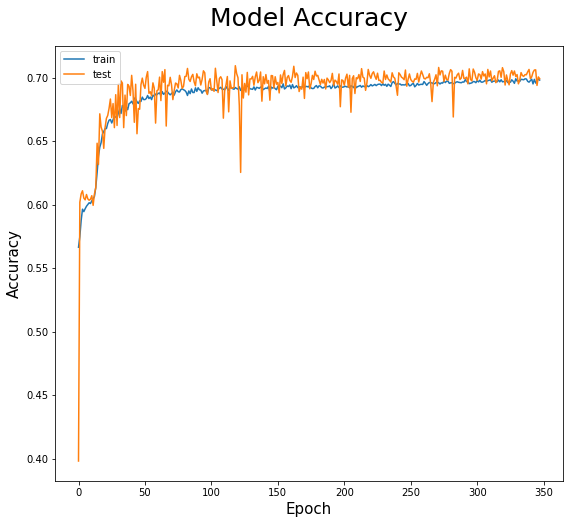

In [358]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

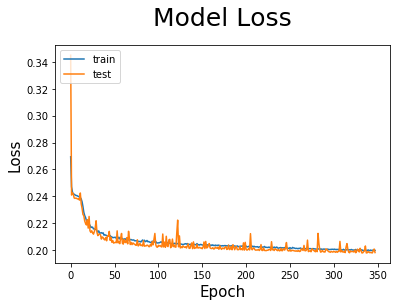

In [359]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [360]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [361]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

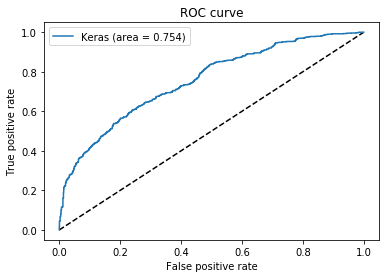

In [362]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [363]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [364]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [365]:
import seaborn as sns


Text(0.5, 15.0, 'Predicted label')

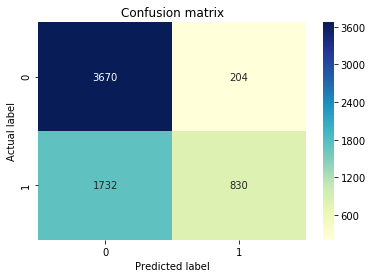

In [366]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')